In [ ]:
!pip install sentence_transformers

In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Capstone Project/Models Comparison/"

In [ ]:
data_path1 = "/content/drive/MyDrive/Capstone/Model_result/"

In [ ]:
data_path2 = "/content/drive/MyDrive/Capstone Project/Data/Data_clean_processed_sample.csv"

In [ ]:
sample = pd.read_csv(data_path2)

In [ ]:
sample

,email_id,subject,email,bow,embeddings
0,saibi-e\inbox\612#1,WSCC (Mahave 02) (San Juan 03),"Dear Power Outage Database Customer,\n\nAttach...",dear power outage database customer attached f...,"dear power outage database customer, attached ..."
1,kitchen-l\_americas\netco_restart\28#2,RE:,Ryan is waffling. I talked to him this weeken...,ryan waffling talked weekend said wife want mo...,ryan waffling. talked weekend said wife want m...
2,motley-m\sent_items\1#1,SSARR Update Available Now,"<center><LI><a Href=""http://www.nwrfc.noaa.gov...",columbia river basin lower snake updated mar,columbia river basin lower snake.....updated: mar
3,kaminski-v\all_documents\577#1,Credit Risk Model Comments - at this point.,"Hi everyone,\n\nI have run the model and, alon...",everyone run model along contract brief questi...,"everyone, run model and, along contract brief ..."
4,quigley-d\sent_items\480#1,Confirmation: Risk Management Simulation Mee...,"Hi Dutch, This message is to confirm ou...",dutch message confirm meeting thursday novembe...,"dutch, message confirm meeting on, thursday, n..."
...,...,...,...,...,...
19995,dasovich-j\all_documents\8190#1,EvMBA Seminar in Int. Business 2001 - Spam Update,"Dear EvMBA students, Please ignore this messa...",dear evmba student please ignore message apply...,"dear evmba students, please ignore message app..."
19996,blair-l\meetings\417#1,Reservation Flash Mtg. EB4194,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,calendar entry appointment description reserva...,calendar entry: appointment description: reser...
19997,haedicke-m\all_documents\693#2,Energy Conference in Houston,Please handle. 4 breakout rooms is a safe num...,please handle breakout room safe number mark,please handle. breakout room safe number. mark
19998,kaminski-v\sent_items\2532#1,=09Contact info for Rusty Parks,I want to thank everyone for making this an en...,want thank everyone making enjoyable education...,want thank everyone making enjoyable education...


In [ ]:
file_name=["all-MiniLM-L6-v2",10,(1,2),7,10,50]
file_name=[str(x) for x in file_name]
file_name="_".join(file_name)

In [ ]:
bert_topics = pd.read_csv(data_path + r'BERTopic/top_words_{}_nomask.csv'.format(file_name))
bert_assign = pd.read_csv(data_path + r'BERTopic/assignments_{}_nomask.csv'.format(file_name))
bert_wc = bert_topics

In [ ]:
bert_assign

,email_id,subject,email,bow,embeddings,topic,probs
0,saibi-e\inbox\612#1,WSCC (Mahave 02) (San Juan 03),"Dear Power Outage Database Customer,\n\nAttach...",dear power outage database customer attached f...,"dear power outage database customer, attached ...",-1,3.736004e-03
1,kitchen-l\_americas\netco_restart\28#2,RE:,Ryan is waffling. I talked to him this weeken...,ryan waffling talked weekend said wife want mo...,ryan waffling. talked weekend said wife want m...,-1,2.396999e-02
2,motley-m\sent_items\1#1,SSARR Update Available Now,"<center><LI><a Href=""http://www.nwrfc.noaa.gov...",columbia river basin lower snake updated mar,columbia river basin lower snake.....updated: mar,-1,3.276585e-02
3,kaminski-v\all_documents\577#1,Credit Risk Model Comments - at this point.,"Hi everyone,\n\nI have run the model and, alon...",everyone run model along contract brief questi...,"everyone, run model and, along contract brief ...",-1,4.917910e-02
4,quigley-d\sent_items\480#1,Confirmation: Risk Management Simulation Mee...,"Hi Dutch, This message is to confirm ou...",dutch message confirm meeting thursday novembe...,"dutch, message confirm meeting on, thursday, n...",6,6.077097e-01
...,...,...,...,...,...,...,...
19995,dasovich-j\all_documents\8190#1,EvMBA Seminar in Int. Business 2001 - Spam Update,"Dear EvMBA students, Please ignore this messa...",dear evmba student please ignore message apply...,"dear evmba students, please ignore message app...",-1,1.495861e-02
19996,blair-l\meetings\417#1,Reservation Flash Mtg. EB4194,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,calendar entry appointment description reserva...,calendar entry: appointment description: reser...,-1,2.981787e-307
19997,haedicke-m\all_documents\693#2,Energy Conference in Houston,Please handle. 4 breakout rooms is a safe num...,please handle breakout room safe number mark,please handle. breakout room safe number. mark,-1,4.129080e-02
19998,kaminski-v\sent_items\2532#1,=09Contact info for Rusty Parks,I want to thank everyone for making this an en...,want thank everyone making enjoyable education...,want thank everyone making enjoyable education...,-1,2.046060e-02


In [ ]:
lda_assign = pd.read_csv(data_path+"LDA4_emails_assignments.csv")
lda_topics = pd.read_csv(data_path+"LDA4_topics_100.csv")
lda_wc = lda_topics

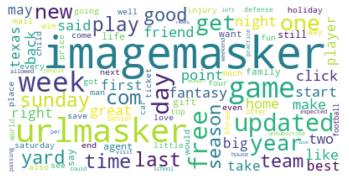

In [ ]:
d = {}
for topic, term, beta in lda_topics[lda_topics['topic'] == 2].values:
  d[term] = beta

wc = WordCloud(background_color = 'white')
wc.generate_from_frequencies(d)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

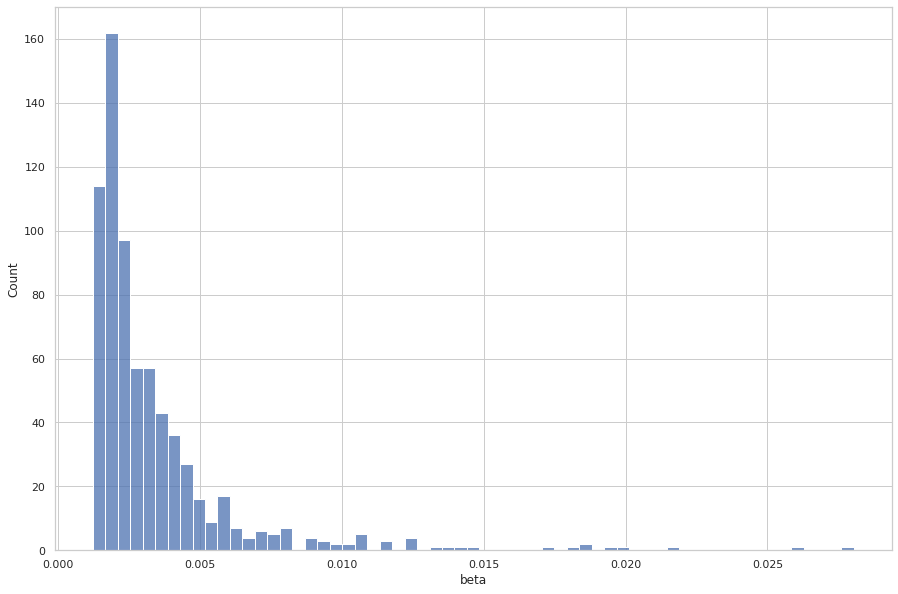

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=lda_topics['beta'])

In [ ]:
lda_topics

,index,topic,term,beta,embedding,beta_sum,topic_embedding
0,0,1,gas,0.012241,"[-0.048004232, 0.044768233, -0.04335268, 0.085...",0.033281,"[-0.017656267, 0.016466044, -0.015945394, 0.03..."
1,1,1,market,0.007647,"[-0.028863644, 0.003469533, -0.07871369, 0.022...",0.033281,"[-0.006632122, 0.00079720933, -0.01808638, 0.0..."
2,2,1,price,0.006842,"[-0.08021142, 0.02680241, -0.06569746, 0.04516...",0.033281,"[-0.016489537, 0.00550993, -0.013505817, 0.009..."
3,3,1,day,0.006551,"[-0.07447901, 0.10445289, 0.026007848, 0.08215...",0.033281,"[-0.014660702, 0.020560862, 0.0051194727, 0.01..."
4,100,2,imagemasker,0.020088,"[-0.016619077, 0.041727968, -0.017541325, 0.02...",0.058590,"[-0.0056980276, 0.014306879, -0.0060142297, 0...."
...,...,...,...,...,...,...,...
61,604,7,urlmasker,0.008841,"[-0.057755493, 0.03171992, -0.051925346, -0.04...",0.093225,"[-0.00547755, 0.0030083277, -0.0049246172, -0...."
62,605,7,com,0.008106,"[-0.07556228, -0.03347698, -0.046600204, 0.008...",0.093225,"[-0.006570281, -0.0029108857, -0.0040519745, 0..."
63,606,7,information,0.007997,"[0.0766558, 0.11613224, -0.024567451, 0.043624...",0.093225,"[0.0065754424, 0.009961683, -0.0021073665, 0.0..."
64,607,7,enron,0.007717,"[-0.06693706, 0.019121258, -0.022185644, -0.01...",0.093225,"[-0.005541295, 0.0015829277, -0.0018366087, -0..."


## Weighted average embedding

In [ ]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sample['email_embedding'] = [x for x in embedding_model.encode(sample['bow'])]

In [ ]:
lda_topics[lda_topics['beta']>0.006]

,topic,term,beta
0,1,gas,0.012241
1,1,market,0.007647
2,1,price,0.006842
3,1,day,0.006551
100,2,imagemasker,0.020088
...,...,...,...
604,7,urlmasker,0.008841
605,7,com,0.008106
606,7,information,0.007997
607,7,enron,0.007717


In [ ]:
# lda_topics = lda_topics.groupby('topic').head(10).reset_index()
lda_topics = lda_topics[lda_topics['beta']>0.006].reset_index()
lda_topics['embedding'] = [x for x in embedding_model.encode(lda_topics['term'])]
lda_topics = lda_topics.assign(beta_sum=lda_topics.groupby('topic')['beta'].transform('sum'))
lda_topics['topic_embedding'] = lda_topics.apply(lambda row: row['beta']*row['embedding']/row['beta_sum'], axis = 1)
lda_topic = lda_topics.groupby(['topic'])['topic_embedding'].sum().to_frame(name = 'LDA embedding').reset_index()

In [ ]:
lda = lda_assign.merge(lda_topic, on = 'topic')[['document', 'LDA embedding','topic','email']]
lda = lda.rename(columns = {'document':'email_id'})
lda = lda.merge(sample, on = 'email_id')

In [ ]:
lda['LDA similarity'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(lda['LDA embedding'], lda['email_embedding'])]
lda = lda[['email_id', 'topic', 'LDA embedding', 'LDA similarity']]

In [ ]:
lda

,email_id,topic,LDA embedding,LDA similarity
0,allen-p\all_documents\14#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.167401
1,allen-p\all_documents\141#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.067528
2,allen-p\all_documents\199#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.113579
3,allen-p\all_documents\334#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.333268
4,allen-p\all_documents\370#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.203875
...,...,...,...,...
19966,zipper-a\deleted_items\468#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",0.526734
19967,zipper-a\inbox\134#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",0.238025
19968,zipper-a\inbox\148#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",0.283061
19969,zipper-a\sent_items\151#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",0.366237


In [ ]:
bert_topics['embedding'] = [x for x in embedding_model.encode(bert_topics['top_words'])]
bert_topics = bert_topics.assign(beta_sum=bert_topics.groupby('topic')['c-tf-idf'].transform('sum'))
bert_topics['topic_embedding'] = bert_topics.apply(lambda row: row['c-tf-idf']*row['embedding']/row['beta_sum'], axis = 1)
bert_topic = bert_topics.groupby(['topic'])['topic_embedding'].sum().to_frame(name = 'BERTopic embedding').reset_index()

In [ ]:
bert = bert_assign.merge(bert_topic, on = 'topic')[['email_id', 'BERTopic embedding','topic','email','bow']]
# bert['topic'] = bert['topic'].apply(lambda x:x+1)
bert = bert.merge(sample, on = 'email_id')
bert['BERTopic similarity'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(bert['BERTopic embedding'], bert['email_embedding'])]
bert = bert[['email_id','topic', 'BERTopic embedding', 'BERTopic similarity']]
bert 

,email_id,topic,BERTopic embedding,BERTopic similarity
0,quigley-d\sent_items\480#1,6,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.490819
1,mann-k\all_documents\2696#1,6,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.405667
2,sanders-r\all_documents\148#3,6,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.396530
3,jones-t\all_documents\5821#1,6,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.490752
4,lenhart-m\inbox\29#1,6,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.540229
...,...,...,...,...
3281,mann-k\all_documents\871#1,4,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",0.307238
3282,neal-s\inbox\132#1,4,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",0.369855
3283,ring-r\eesirenewableenergy\151#2,4,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",0.289168
3284,mann-k\all_documents\3593#5,4,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",0.242580


In [ ]:
df = sample[['email_id', 'email', 'bow']].merge(lda, on = 'email_id', how = 'outer')
df = df.merge(bert, on = 'email_id', how = 'outer')
df = df.rename(columns = {'topic_x':'LDA topic', 'topic_y':'BERTopic topic', 'email_y':'email'})
df

,email_id,email,bow,LDA topic,LDA embedding,LDA similarity,BERTopic topic,BERTopic embedding,BERTopic similarity
0,saibi-e\inbox\612#1,"Dear Power Outage Database Customer,\n\nAttach...",dear power outage database customer attached f...,6.0,"[-0.046475634, 0.0058206283, -0.009567961, 0.0...",0.234671,NaN,NaN,NaN
1,kitchen-l\_americas\netco_restart\28#2,Ryan is waffling. I talked to him this weeken...,ryan waffling talked weekend said wife want mo...,5.0,"[-0.07046429, 0.025576884, -0.037218597, -0.00...",0.246484,NaN,NaN,NaN
2,motley-m\sent_items\1#1,"<center><LI><a Href=""http://www.nwrfc.noaa.gov...",columbia river basin lower snake updated mar,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.060404,NaN,NaN,NaN
3,kaminski-v\all_documents\577#1,"Hi everyone,\n\nI have run the model and, alon...",everyone run model along contract brief questi...,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.046050,NaN,NaN,NaN
4,quigley-d\sent_items\480#1,"Hi Dutch, This message is to confirm ou...",dutch message confirm meeting thursday novembe...,6.0,"[-0.046475634, 0.0058206283, -0.009567961, 0.0...",0.450182,6.0,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",0.490819
...,...,...,...,...,...,...,...,...,...
19995,dasovich-j\all_documents\8190#1,"Dear EvMBA students, Please ignore this messa...",dear evmba student please ignore message apply...,7.0,"[-0.053664498, 0.011460277, -0.02903069, -0.00...",0.314106,NaN,NaN,NaN
19996,blair-l\meetings\417#1,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,calendar entry appointment description reserva...,7.0,"[-0.053664498, 0.011460277, -0.02903069, -0.00...",0.238118,NaN,NaN,NaN
19997,haedicke-m\all_documents\693#2,Please handle. 4 breakout rooms is a safe num...,please handle breakout room safe number mark,5.0,"[-0.07046429, 0.025576884, -0.037218597, -0.00...",0.223201,NaN,NaN,NaN
19998,kaminski-v\sent_items\2532#1,I want to thank everyone for making this an en...,want thank everyone making enjoyable education...,5.0,"[-0.07046429, 0.025576884, -0.037218597, -0.00...",0.223036,NaN,NaN,NaN


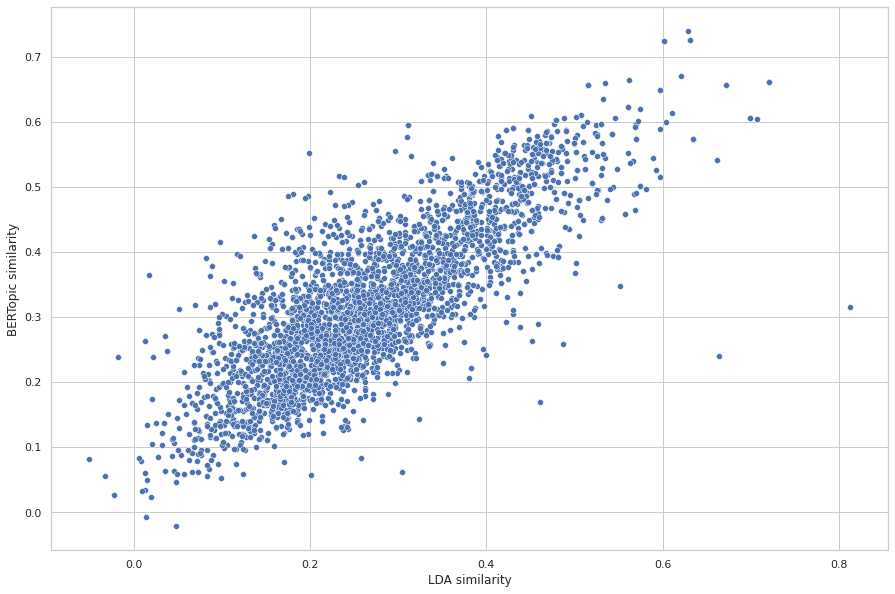

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
p = sns.scatterplot(data=df.dropna(axis = 0), x="LDA similarity", y="BERTopic similarity")

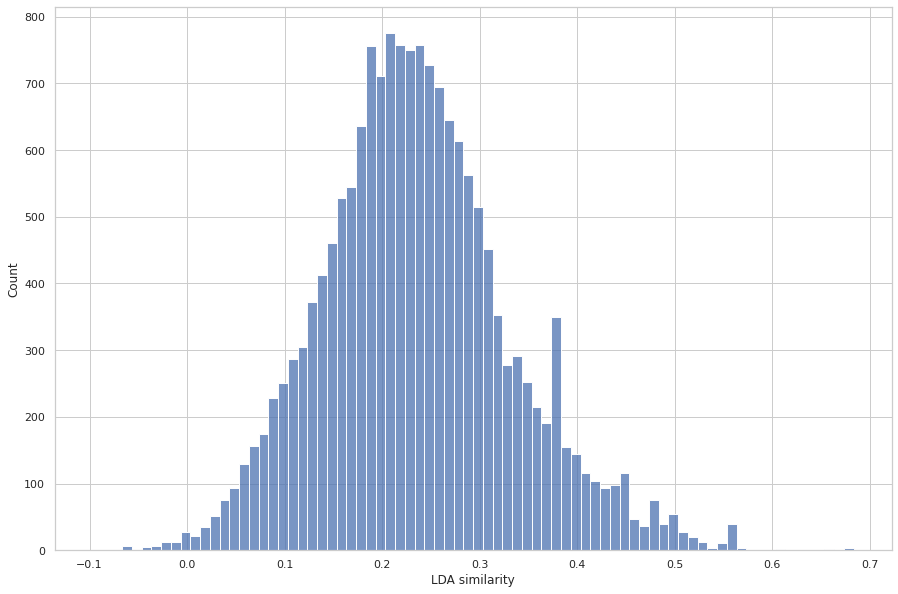

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df[df['BERTopic topic'].isnull()]['LDA similarity'], binwidth = 0.01)

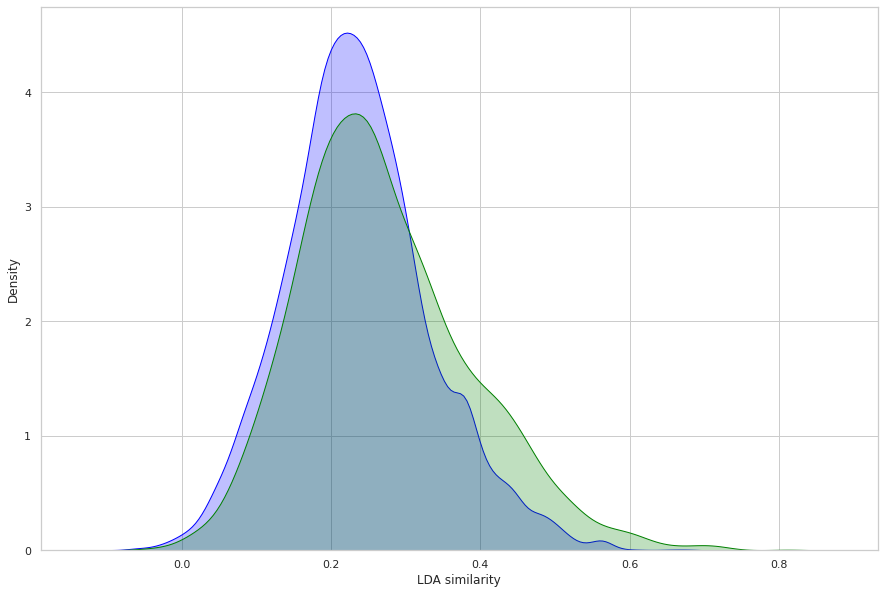

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.kdeplot(df['LDA similarity'][df['BERTopic topic'].isnull()], shade=1, color='blue')
sns.kdeplot(df['LDA similarity'][~df['BERTopic topic'].isnull()], shade=1, color='green')

In [ ]:
df[df['BERTopic similarity'] <= 0].dropna(axis = 0)

,email_id,email,bow,LDA topic,LDA embedding,LDA similarity,BERTopic topic,BERTopic embedding,BERTopic similarity
12236,cash-m\sent_items\280#3,We were intending to put these results (which ...,intending put result would actually preliminar...,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",0.013636,1.0,"[-0.036720734, 0.034159876, -0.03969573, 0.046...",-0.008053
16284,lavorato-j\deleted_items\251#1,The hold up in setting curves is we need a C$ ...,hold setting curve need forward curve curve se...,5.0,"[-0.07046429, 0.025576884, -0.037218597, -0.00...",0.048334,1.0,"[-0.036720734, 0.034159876, -0.03969573, 0.046...",-0.020855


In [ ]:
print(df[df['BERTopic similarity'] <= 0].dropna(axis = 0).iloc[1]['email'])

The hold up in setting curves is we need a C$ forward curve.  If this curve was set sooner we could get ours out earlier.  Regards, 


In [ ]:
df[df['LDA similarity'] <= 0].iloc[1]

email_id                                 haedicke-m\all_documents\4923#1
email                  Jim and Mark, as you know, we have established...
bow                    jim mark know established retail affiliate wit...
LDA topic                                                            1.0
LDA embedding          [-0.05543863, 0.043334045, -0.042418115, 0.062...
LDA similarity                                                 -0.027216
BERTopic topic                                                       NaN
BERTopic embedding                                                   NaN
BERTopic similarity                                                  NaN
Name: 959, dtype: object

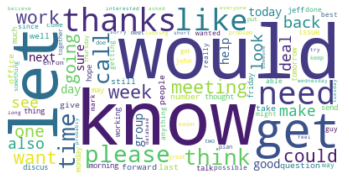

In [ ]:
d = {}
for topic, term, beta in lda_wc[lda_wc['topic'] == 5].values:
  d[term] = beta

wc = WordCloud(background_color = 'white')
wc.generate_from_frequencies(d)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

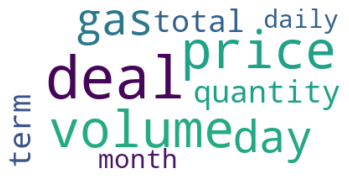

In [ ]:
d = {}
for topic, term, beta, prob in bert_wc[bert_wc['topic'] == 1].values:
  d[term] = beta

wc = WordCloud(background_color = 'white')
wc.generate_from_frequencies(d)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Calculate cosine similarities

In [ ]:
df = lda.merge(bert, left_on = 'document', right_on = 'email_id')

In [ ]:
df

,document,embedding_x,topic_x,email_x,email_id,embedding_y,topic_y,email_y
0,allen-p\all_documents\199#1,"[-0.059170052, 0.052910578, -0.036135774, 0.03...",1,can you build something to look at historical ...,allen-p\all_documents\199#1,"[-0.03672746, 0.03416208, -0.039695505, 0.0461...",3,build something look historical price saved cu...
1,allen-p\all_documents\334#1,"[-0.059170052, 0.052910578, -0.036135774, 0.03...",1,"Julie, The numbers for January are below: ...",allen-p\all_documents\334#1,"[-0.03672746, 0.03416208, -0.039695505, 0.0461...",3,julie number january actual flow gas daily spr...
2,allen-p\sent_items\220#2,"[-0.059170052, 0.052910578, -0.036135774, 0.03...",1,Here is the file of historical midmarkets for ...,allen-p\sent_items\220#2,"[-0.03672746, 0.03416208, -0.039695505, 0.0461...",3,file historical midmarkets sumas malin call qu...
3,arnold-j\all_documents\740#1,"[-0.059170052, 0.052910578, -0.036135774, 0.03...",1,where's your curve now? MAy June Jul Aug Sep O...,arnold-j\all_documents\740#1,"[-0.03672746, 0.03416208, -0.039695505, 0.0461...",3,curve may june jul aug sep oct nov dec jan
4,arnold-j\all_documents\857#1,"[-0.059170052, 0.052910578, -0.036135774, 0.03...",1,what are your thoughts on ap-oct nov-mar 02 0...,arnold-j\all_documents\857#1,"[-0.03672746, 0.03416208, -0.039695505, 0.0461...",3,thought oct nov mar price level outlook
...,...,...,...,...,...,...,...,...
3789,whitt-m\inbox\70#1,"[-0.048351802, 0.021658868, -0.034773342, 0.00...",4,Energy Jobs Network (EJN) a large group of ene...,whitt-m\inbox\70#1,"[-0.03940094, 0.08190825, -0.0075005325, 0.072...",5,energy job network ejn large group energy asso...
3790,wolfe-j\05_saved\22#1,"[-0.048351802, 0.021658868, -0.034773342, 0.00...",4,http://biz.yahoo.com/t/27/5594.html,wolfe-j\05_saved\22#1,"[-0.013852587, 0.03056758, -0.027958838, 0.018...",4,urlmasker
3791,wolfe-j\06_saved\113#1,"[-0.048351802, 0.021658868, -0.034773342, 0.00...",4,http://www.cnn.com/2001/US/06/01/idaho.standof...,wolfe-j\06_saved\113#1,"[-0.013852587, 0.03056758, -0.027958838, 0.018...",4,urlmasker
3792,wolfe-j\08_saved\32#1,"[-0.048351802, 0.021658868, -0.034773342, 0.00...",4,>http://www.genetix.com.mt/intro/sam.swf \r\n>...,wolfe-j\08_saved\32#1,"[-0.013852587, 0.03056758, -0.027958838, 0.018...",4,urlmasker tim water national channel sale viaw...


In [ ]:
df['cos_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(df['embedding_x'], df['embedding_y'])]

In [ ]:
name = {'topic_x':'LDA', 'topic_y':'BERTopic', 'embedding_x': 'LDA embedding', 'embedding_y': 'BERTopic embedding', 'email_y':'email'}
df = df[['email_id','topic_x','topic_y','cos_sim','embedding_x','embedding_y', 'email_y']].rename(columns = name)
df

,email_id,LDA,BERTopic,cos_sim,LDA embedding,BERTopic embedding,email
0,allen-p\all_documents\199#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",build something look historical price saved cu...
1,allen-p\all_documents\334#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",julie number january actual flow gas daily spr...
2,allen-p\sent_items\220#2,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",file historical midmarkets sumas malin call qu...
3,arnold-j\all_documents\740#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",curve may june jul aug sep oct nov dec jan
4,arnold-j\all_documents\857#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",thought oct nov mar price level outlook
...,...,...,...,...,...,...,...
3789,whitt-m\inbox\70#1,4,5,0.663900,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.03940094, 0.08190825, -0.0075005325, 0.072...",energy job network ejn large group energy asso...
3790,wolfe-j\05_saved\22#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker
3791,wolfe-j\06_saved\113#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker
3792,wolfe-j\08_saved\32#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker tim water national channel sale viaw...


In [ ]:
df.sort_values(by=['cos_sim'], ascending=False)

,email_id,LDA,BERTopic,cos_sim,LDA embedding,BERTopic embedding,email
1789,dasovich-j\all_documents\4702#1,1,3,0.984344,"[-0.04228933, 0.07288662, -0.01882995, 0.06935...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",edison mission energy power project start cons...
1816,dasovich-j\inbox\212#1,1,3,0.984344,"[-0.04228933, 0.07288662, -0.01882995, 0.06935...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",knightswood way granite bay phone california l...
1809,dasovich-j\deleted_items\1655#1,1,3,0.984344,"[-0.04228933, 0.07288662, -0.01882995, 0.06935...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",tom california contact enron could call invest...
1810,dasovich-j\deleted_items\1776#1,1,3,0.984344,"[-0.04228933, 0.07288662, -0.01882995, 0.06935...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",thank address petition currently assumes forei...
1811,dasovich-j\deleted_items\1806#1,1,3,0.984344,"[-0.04228933, 0.07288662, -0.01882995, 0.06935...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",question comment regarding report please conta...
...,...,...,...,...,...,...,...
2235,haedicke-m\inbox\109#1,5,7,0.568413,"[-0.0491832, 0.029398266, -0.022282211, 0.0214...","[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",thursday afternoon received nrg transcript com...
3267,mann-k\all_documents\2740#3,6,1,0.535829,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.035389565, -0.0053373217, -0.023311002, -0...",hurt
3253,jones-t\all_documents\12393#4,6,1,0.535829,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.035389565, -0.0053373217, -0.023311002, -0...",company
3269,nemec-g\all_documents\5029#2,6,1,0.535829,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.035389565, -0.0053373217, -0.023311002, -0...",disgusting


[Text(0.5, 1.0, 'Distribution of similarities between topics assgined by LDA and BERTopic')]

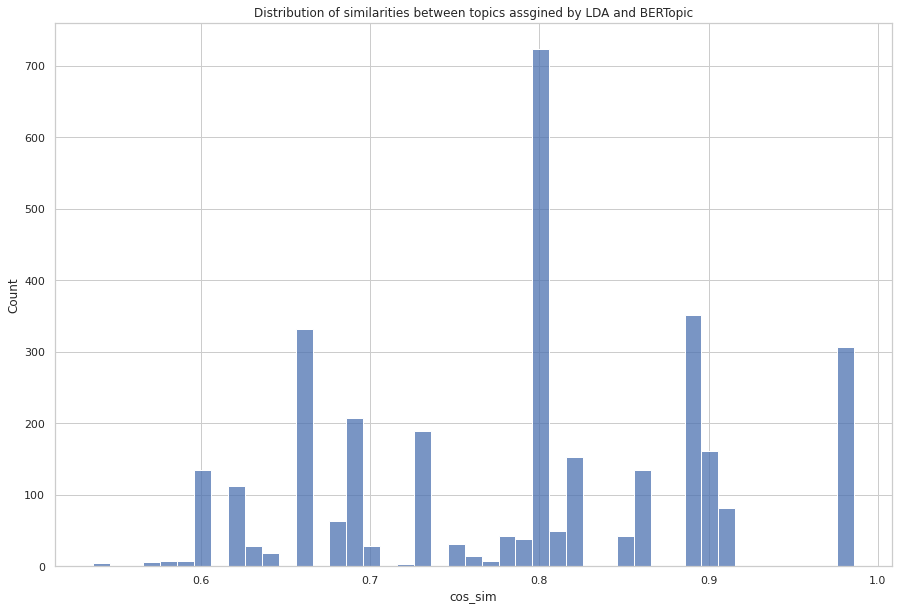

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['cos_sim'], binwidth = 0.01).set(title='Distribution of similarities between topics assgined by LDA and BERTopic')

In [ ]:
df.to_csv(data_path+'Weighted_average_similarity.csv')

In [ ]:
df[['email_id','term','top_words','cos_sim']].to_csv(data_path+'Top_word_similarity.csv')

## Topic embedding vs email embedding

In [ ]:
lda = lda.merge(sample, left_on = 'document', right_on = 'email_id')[['email_id','topic','embedding','bow']]

In [ ]:
lda['email_embedding'] = [x for x in embedding_model.encode(lda['bow'])]

In [ ]:
lda['LDA_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(lda['embedding'], lda['email_embedding'])]

[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by LDA')]

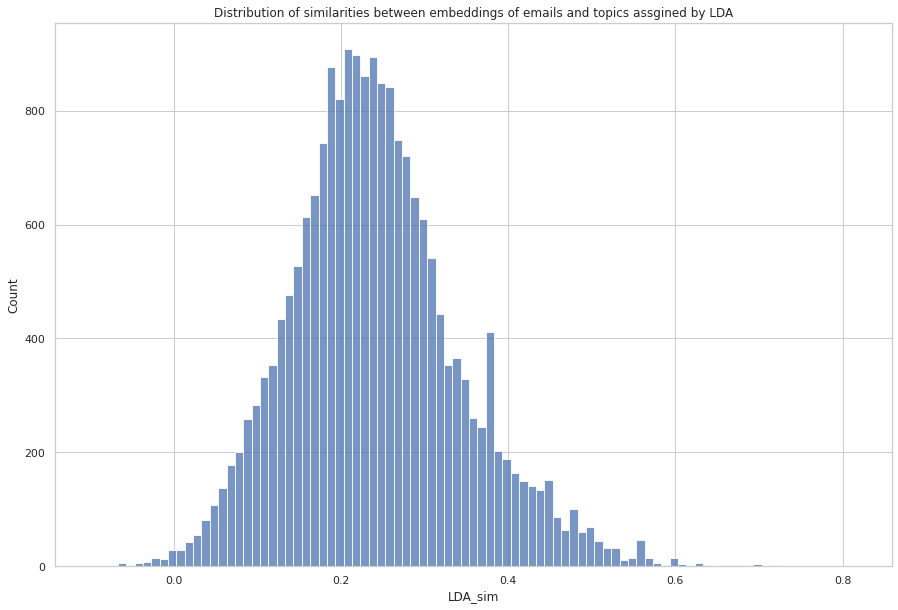

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=lda['LDA_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by LDA')

In [ ]:
lda['len'] = lda['bow'].map(lambda x: len(x.split()))

In [ ]:
lda

,email_id,topic,embedding,bow,email_embedding,LDA_sim,len
0,allen-p\all_documents\14#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",transwestern pipeline posted new notice since ...,"[0.038733624, -0.019193297, -0.02705661, 0.057...",0.167401,31
1,allen-p\all_documents\141#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",enclosed preliminary proforma westgate propert...,"[0.06745809, -0.06927381, 0.040837947, 0.06634...",0.067528,355
2,allen-p\all_documents\199#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",build something look historical price saved cu...,"[-0.022109661, -0.00039771345, -0.01979152, 0....",0.113579,21
3,allen-p\all_documents\334#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",julie number january actual flow gas daily spr...,"[-0.04901645, 0.039041918, 0.004153427, 0.0594...",0.333268,37
4,allen-p\all_documents\370#1,1,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",privileged confidential communication attorney...,"[-0.060334366, 0.044261046, -0.012915185, 0.02...",0.203875,89
...,...,...,...,...,...,...,...
19966,zipper-a\deleted_items\468#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",fyi urlmasker link internetweek story due mond...,"[-0.11478782, -0.008787659, -0.038884684, -0.0...",0.526734,11
19967,zipper-a\inbox\134#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",market force problem cyberspace energy compass...,"[-0.034866113, -0.11173589, 0.07252594, -0.000...",0.238025,315
19968,zipper-a\inbox\148#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",normal operation window tuesday june 12th uune...,"[0.032869294, -0.072759874, 0.044319954, 0.024...",0.283061,169
19969,zipper-a\sent_items\151#1,4,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",stewart strong belief kiodex successful market...,"[0.031000404, -0.054039404, -0.04601359, -0.07...",0.366237,31


[None]

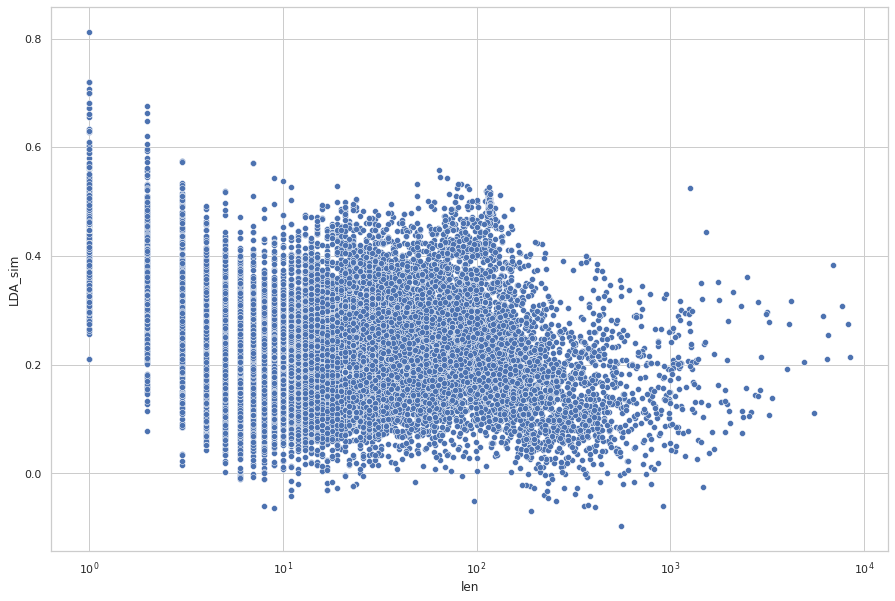

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
p = sns.scatterplot(data=lda, x="len", y="LDA_sim")
p.set(xscale = 'log')

In [ ]:
bert

,email_id,embedding,topic,email
0,quigley-d\sent_items\480#1,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",7,"Hi Dutch, This message is to confirm ou..."
1,mann-k\all_documents\2696#1,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",7,Security Level:? Internal Kay Mann ...
2,sanders-r\all_documents\148#3,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",7,FYI... Jeff Shankman and Fred Lagrasta are tr...
3,jones-t\all_documents\5821#1,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",7,We have received an executed copy of the Non-D...
4,lenhart-m\inbox\29#1,"[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",7,do you still want to go out tonight? *...
...,...,...,...,...
3281,mann-k\all_documents\871#1,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",5,<<CSFB_EnergyTech_sept12.pdf>>\n\nSummary of ...
3282,neal-s\inbox\132#1,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",5,"Torrey, \tWell we finally have a final product..."
3283,ring-r\eesirenewableenergy\151#2,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",5,"Also, unless something's changed, the obligati..."
3284,mann-k\all_documents\3593#5,"[-0.049470842, 0.034506153, -0.02574978, 0.006...",5,"Kay,\n\nThe enovate appointment looks fine, bu..."


In [ ]:
df = lda.merge(bert, on = 'email_id', how = 'outer')

KeyError: ignored

In [ ]:
df

,email_id,topic_x,embedding_x,bow,email_embedding,LDA_sim,embedding_y,topic_y,email
0,allen-p\all_documents\14#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",transwestern pipeline posted new notice since ...,"[0.038733624, -0.019193297, -0.02705661, 0.057...",0.167401,NaN,NaN,NaN
1,allen-p\all_documents\141#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",enclosed preliminary proforma westgate propert...,"[0.06745809, -0.06927381, 0.040837947, 0.06634...",0.067528,NaN,NaN,NaN
2,allen-p\all_documents\199#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",build something look historical price saved cu...,"[-0.022109661, -0.00039771345, -0.01979152, 0....",0.113579,"[-0.036720734, 0.034159876, -0.03969573, 0.046...",2.0,can you build something to look at historical ...
3,allen-p\all_documents\334#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",julie number january actual flow gas daily spr...,"[-0.04901645, 0.039041918, 0.004153427, 0.0594...",0.333268,"[-0.036720734, 0.034159876, -0.03969573, 0.046...",2.0,"Julie, The numbers for January are below: ..."
4,allen-p\all_documents\370#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",privileged confidential communication attorney...,"[-0.060334366, 0.044261046, -0.012915185, 0.02...",0.203875,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
19971,shapiro-r\notre_dame\2#1,NaN,NaN,NaN,NaN,NaN,"[-0.036720734, 0.034159876, -0.03969573, 0.046...",2.0,The $$# is 530MM
19972,bass-e\all_documents\188#2,NaN,NaN,NaN,NaN,NaN,"[-0.035389565, -0.0053373217, -0.023311002, -0...",1.0,hehehe
19973,guzman-m\all_documents\402#1,NaN,NaN,NaN,NaN,NaN,"[-0.035389565, -0.0053373217, -0.023311002, -0...",1.0,what's up jerky
19974,bass-e\all_documents\189#2,NaN,NaN,NaN,NaN,NaN,"[-0.035389565, -0.0053373217, -0.023311002, -0...",1.0,hehehe


In [ ]:
name = {'topic_x':'LDA', 'topic_y':'BERTopic', 'embedding_x':'LDA embedding', 'embedding_y':'BERTopic embedding'}
df = df.rename(columns = name)

In [ ]:
df = df[df['LDA_sim'] < 0]

In [ ]:
df['bert_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(df['BERTopic embedding'], df['email_embedding'])]

In [ ]:
df

,email_id,LDA,LDA embedding,bow,email_embedding,LDA_sim,len,BERTopic embedding,BERTopic,email
143,beck-s\inbox\548#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",aware latest risk management policy specifical...,"[0.011471732, -0.049032893, -0.09636437, 0.004...",-0.002201,243.0,NaN,NaN,NaN
304,cash-m\inbox\252#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",message dated pacific standard time michelle c...,"[-0.043886125, 0.019133197, -0.0031368262, 0.0...",-0.004401,84.0,NaN,NaN,NaN
410,dasovich-j\all_documents\493#1,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",attached summary testimony bypass standby rate...,"[-0.07942591, 0.029484281, 0.042304747, -0.054...",-0.019565,12.0,NaN,NaN,NaN
434,dasovich-j\deleted_items\2033#2,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",steve originally file replacement credit index...,"[0.019932155, 0.043438695, 0.02876898, -0.0086...",-0.026362,19.0,NaN,NaN,NaN
444,dasovich-j\inbox\941#2,1.0,"[-0.05543863, 0.043334045, -0.042418115, 0.062...",fyi confirmation regarding type dasr joint udc...,"[-0.057704095, -0.08171416, -0.012654454, 0.01...",-0.051212,97.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17085,wolfe-j\06_saved\65#1,2.0,"[-0.04786712, 0.031091066, -0.03549034, 0.0067...",houston community well known assisting neighbo...,"[-0.02318293, -0.07701239, 0.06583232, 0.03599...",-0.000713,363.0,NaN,NaN,NaN
17372,dasovich-j\deleted_items\510#4,6.0,"[-0.046475634, 0.0058206283, -0.009567961, 0.0...",attached file contains detail behind table,"[0.03901388, 0.12037019, -0.06937844, 0.020575...",-0.008049,6.0,NaN,NaN,NaN
19422,haedicke-m\inbox\497#1,4.0,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",isda press report november euro italy rebuts c...,"[-0.10694666, -0.034410648, -0.026440563, -0.0...",-0.024413,1476.0,NaN,NaN,NaN
19825,shackleton-s\all_documents\1351#1,4.0,"[-0.047487732, 0.012008026, -0.03904802, 0.002...",brazil brazilian natural gas tariff gazeta mer...,"[-0.012328327, -0.068219475, -0.024896322, -0....",-0.020034,795.0,NaN,NaN,NaN


In [ ]:
print(df.iloc[0]['bow'])

mckenzie writes splus fit parameter weibull distribution data vector fire free interval forest would like compute probability shape parameter greater use bootstrap presume compute standard error closed expression imagine normal approximation would pretty lame thanks advance suggestion profile likelihood would work well conditional mle scale parameter given shape parameter closed form expression evaluate profile log likelihood shape parameter explicitly used example presentation recent joint statistical meeting using open source software teach mathematical statistic might guess title primarily discussing another implementation language example work minor modification plus pdf file presentation available urlmasker look especially slide profile log likelihood function shape parameter defined profilell function alpha sum dweibull xmp04 lifetime shape alpha scale mean xmp04 lifetimealpha alpha log true profilell negative profile log likelihood estimate mle3 nlm profilell alpha hessian true 

In [ ]:
print(df.iloc[0]['email'])

"D. Mckenzie" <dmck@u.washington.edu> writes:

> Splus 2000 r3.
>
> I have fit a 2-parameter Weibull distribution to a data vector (fire-free
> intervals in forests) and would like to compute the probability that the
> shape parameter is greater than 1.  I can use bootstrap() [I presume] to
> compute the standard error.  Is there a closed expression for CIs? (I
> imagine a normal approximation would be pretty lame here).
>
> Thanks in advance for any suggestions.

Profile likelihood would work well here.  Because the conditional mle
for the scale parameter, given the shape parameter, has a closed-form
expression you can evaluate the profile log-likelihood for the shape
parameter explicitly.

I used this as an example in a presentation at the recent Joint
Statistical Meetings on "Using Open Source Software to Teach
Mathematical Statistics".  (As you might guess from the title, I was
primarily discussing another implementation of the S language but the
examples work - with minor modifica

In [ ]:
df['email_embedding'] = [x for x in embedding_model.encode(df['email'])]

In [ ]:
# df = df[['email_id', 'LDA embedding', 'BERTopic embedding', 'email_embedding']]
df

,email_id,LDA,BERTopic,cos_sim,LDA embedding,BERTopic embedding,email,email_embedding
0,allen-p\all_documents\199#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",build something look historical price saved cu...,"[-0.022109713, -0.00039776383, -0.019791504, 0..."
1,allen-p\all_documents\334#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",julie number january actual flow gas daily spr...,"[-0.049016427, 0.03904189, 0.0041534314, 0.059..."
2,allen-p\sent_items\220#2,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",file historical midmarkets sumas malin call qu...,"[-0.034116533, 0.049713712, -0.054892156, -0.0..."
3,arnold-j\all_documents\740#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",curve may june jul aug sep oct nov dec jan,"[-0.021035489, -0.04300971, -0.019924633, 0.07..."
4,arnold-j\all_documents\857#1,1,3,0.904599,"[-0.059170052, 0.052910578, -0.036135774, 0.03...","[-0.03672746, 0.03416208, -0.039695505, 0.0461...",thought oct nov mar price level outlook,"[-0.032309633, -0.04142609, 0.021257961, 0.059..."
...,...,...,...,...,...,...,...,...
3789,whitt-m\inbox\70#1,4,5,0.663900,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.03940094, 0.08190825, -0.0075005325, 0.072...",energy job network ejn large group energy asso...,"[-0.038781933, 0.0008361144, 0.06619065, 0.092..."
3790,wolfe-j\05_saved\22#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker,"[-0.057755493, 0.03171992, -0.051925346, -0.04..."
3791,wolfe-j\06_saved\113#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker,"[-0.057755493, 0.03171992, -0.051925346, -0.04..."
3792,wolfe-j\08_saved\32#1,4,4,0.492792,"[-0.048351802, 0.021658868, -0.034773342, 0.00...","[-0.013852587, 0.03056758, -0.027958838, 0.018...",urlmasker tim water national channel sale viaw...,"[-0.06023298, 0.0095856, -0.021971526, -0.1177..."


In [ ]:
df['LDA_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(df['LDA embedding'], df['email_embedding'])]

In [ ]:
df['bert_sim'] = [cosine_similarity(x.reshape(1,-1), y.reshape(1,-1))[0][0] for x, y in zip(df['BERTopic embedding'], df['email_embedding'])]

In [ ]:
df

,email_id,LDA,BERTopic,cos_sim,LDA embedding,BERTopic embedding,email,email_embedding,LDA_sim,bert_sim
0,allen-p\all_documents\170#1,7,2,0.692522,"[-0.027920524, 0.026585516, -0.01069784, 0.008...","[-0.036720734, 0.034159876, -0.03969573, 0.046...",lucy rent roll spreadsheet starting look bette...,"[0.0073584984, 0.07123829, -0.068116255, 0.008...",0.041968,0.078715
1,allen-p\all_documents\199#1,7,2,0.692522,"[-0.027920524, 0.026585516, -0.01069784, 0.008...","[-0.036720734, 0.034159876, -0.03969573, 0.046...",build something look historical price saved cu...,"[-0.022109725, -0.00039773804, -0.019791575, 0...",0.109354,0.136875
2,arnold-j\deleted_items\192#1,7,7,0.899630,"[-0.027920524, 0.026585516, -0.01069784, 0.008...","[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",question ever hear guy named jeff gossett enro...,"[-0.026592288, -0.03659012, 0.014223245, -0.02...",0.395899,0.503732
3,arnold-j\sent_items\741#1,7,7,0.899630,"[-0.027920524, 0.026585516, -0.01069784, 0.008...","[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",dear john place original transfer option sent ...,"[-0.04793712, 0.030215435, 0.086782, -0.010455...",0.383691,0.462502
4,arora-h\inbox\saved_mail\35#1,7,7,0.899630,"[-0.027920524, 0.026585516, -0.01069784, 0.008...","[-0.04171349, 0.026319092, 8.293521e-05, -0.00...",harry see gurudwara yesterday planned kirtan e...,"[-0.09264537, 0.018307762, 0.022077397, -0.013...",0.442441,0.508999
...,...,...,...,...,...,...,...,...,...,...
3276,shapiro-r\all_documents\540#1,6,3,0.681063,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",yee little faith dawson dti make big stink sol...,"[-0.016032359, -0.018636908, 0.037017334, -0.0...",0.296513,0.214297
3277,taylor-m\all_documents\395#2,6,5,0.650457,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.049470842, 0.034506153, -0.02574978, 0.006...",rahil according clifford chance european legal...,"[-0.035559896, 0.019701723, -0.021038024, -0.0...",0.240963,0.246675
3278,taylor-m\all_documents\629#3,6,4,0.573338,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.040724672, 0.0082708765, -0.0059886887, 0....",bob latest eta knowledge legal document eta fo...,"[-0.0018333215, 0.050649457, -0.02914459, -0.0...",0.208510,0.241437
3279,whalley-l\all_documents\1093#1,6,3,0.681063,"[-0.049203984, 0.023352394, -0.03227426, 0.011...","[-0.039397016, 0.081905894, -0.007498126, 0.07...",whalley mailing memo reading article posted en...,"[-0.007637228, 0.0069446717, -0.01905392, -0.0...",0.485571,0.258622


[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by BERTopic')]

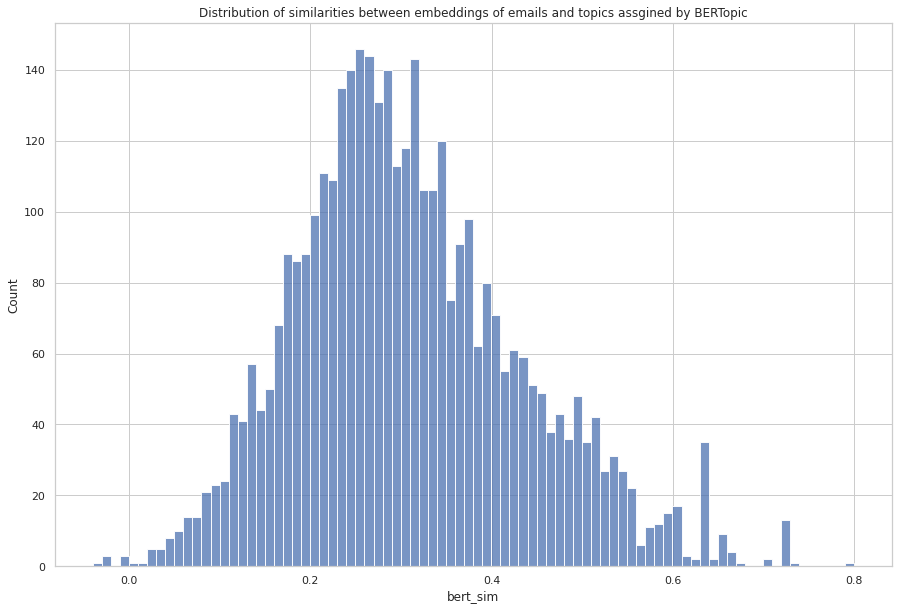

In [ ]:
# mask bert
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['bert_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by BERTopic')

[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by LDA')]

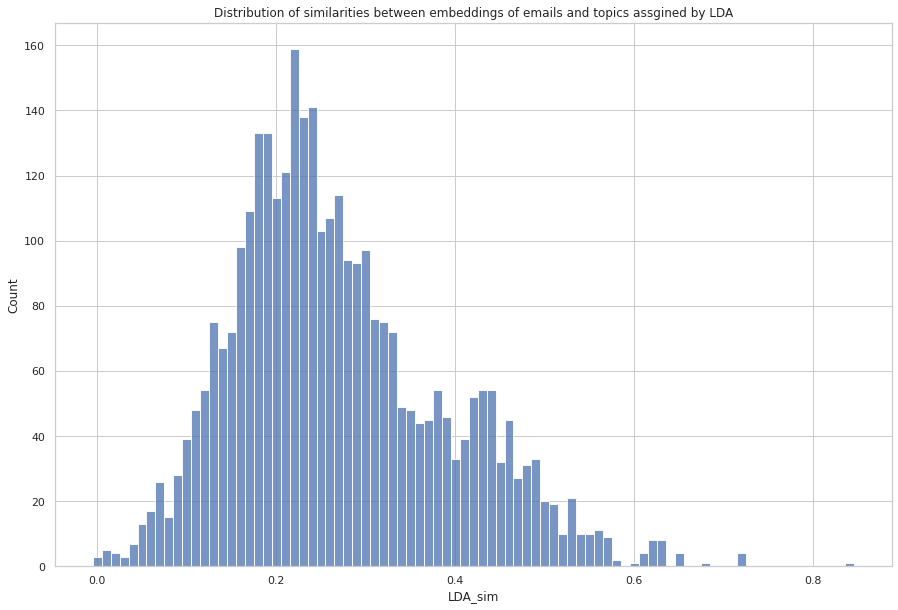

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['LDA_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by LDA')

[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by BERTopic')]

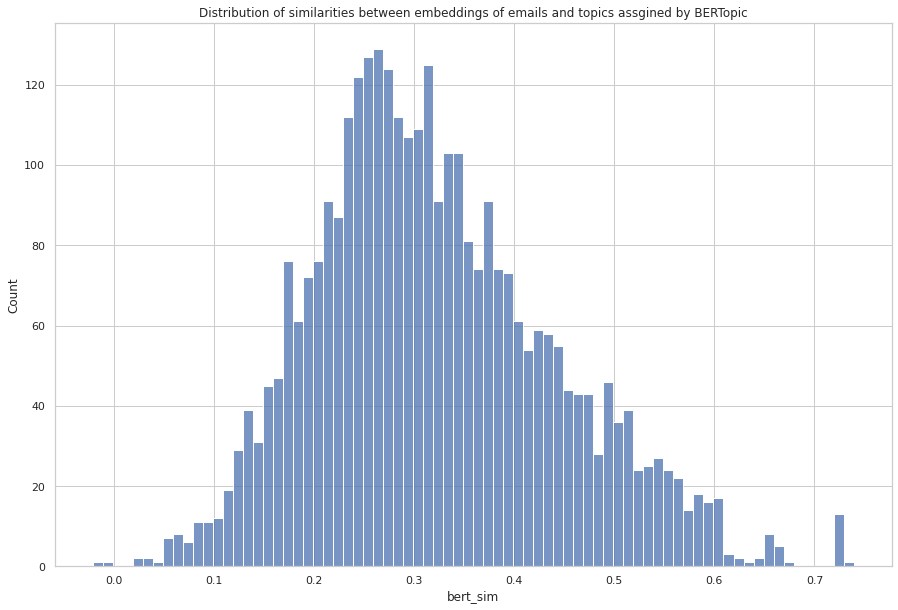

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['bert_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by BERTopic')

[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by LDA')]

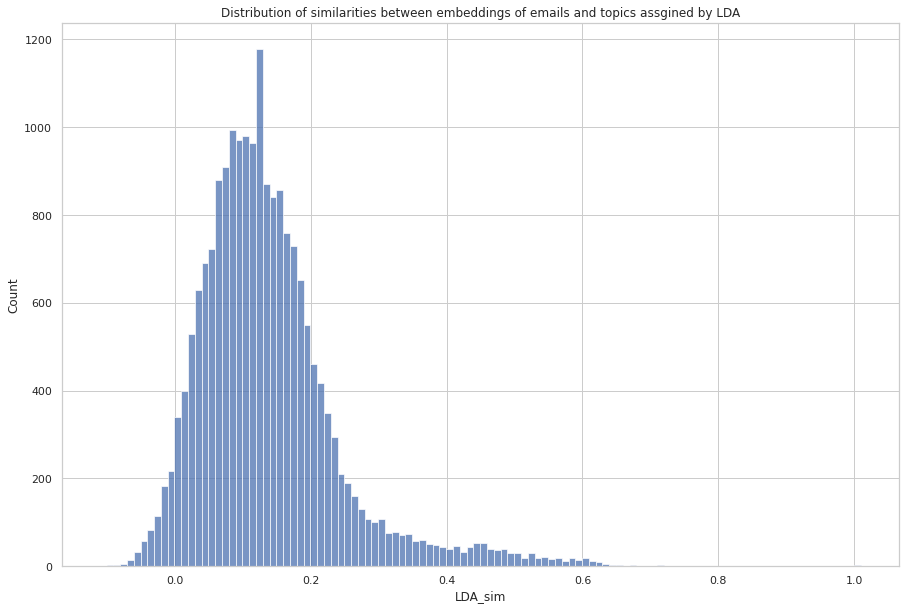

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['LDA_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by LDA')

[Text(0.5, 1.0, 'Distribution of similarities between embeddings of emails and topics assgined by BERTopic')]

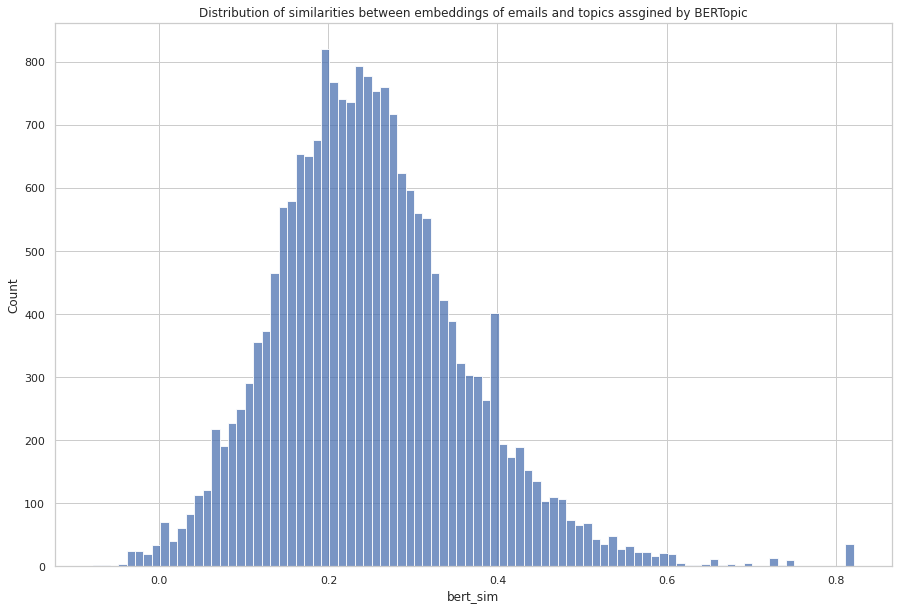

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.histplot(data=df['bert_sim'], binwidth = 0.01).set(title='Distribution of similarities between embeddings of emails and topics assgined by BERTopic')

## Get assigns

In [ ]:
bert_assign['topic'] = bert_assign['topic'].apply(lambda x:x+1)

In [ ]:
bert_assign

,email_id,subject,email,bow,embeddings,topic,probs
0,saibi-e\inbox\612#1,WSCC (Mahave 02) (San Juan 03),dear power outage database customer attached f...,dear power outage database customer attached f...,"dear power outage database customer, attached ...",0,3.736004e-03
1,kitchen-l\_americas\netco_restart\28#2,RE:,ryan waffling talked weekend said wife want mo...,ryan waffling talked weekend said wife want mo...,ryan waffling. talked weekend said wife want m...,0,2.396999e-02
2,motley-m\sent_items\1#1,SSARR Update Available Now,columbia river basin lower snake updated mar,columbia river basin lower snake updated mar,columbia river basin lower snake.....updated: mar,0,3.276585e-02
3,kaminski-v\all_documents\577#1,Credit Risk Model Comments - at this point.,everyone run model along contract brief questi...,everyone run model along contract brief questi...,"everyone, run model and, along contract brief ...",0,4.917910e-02
4,quigley-d\sent_items\480#1,Confirmation: Risk Management Simulation Mee...,dutch message confirm meeting thursday novembe...,dutch message confirm meeting thursday novembe...,"dutch, message confirm meeting on, thursday, n...",7,6.077097e-01
...,...,...,...,...,...,...,...
19995,dasovich-j\all_documents\8190#1,EvMBA Seminar in Int. Business 2001 - Spam Update,dear evmba student please ignore message apply...,dear evmba student please ignore message apply...,"dear evmba students, please ignore message app...",0,1.495861e-02
19996,blair-l\meetings\417#1,Reservation Flash Mtg. EB4194,calendar entry appointment description reserva...,calendar entry appointment description reserva...,calendar entry: appointment description: reser...,0,2.981787e-307
19997,haedicke-m\all_documents\693#2,Energy Conference in Houston,please handle breakout room safe number mark,please handle breakout room safe number mark,please handle. breakout room safe number. mark,0,4.129080e-02
19998,kaminski-v\sent_items\2532#1,=09Contact info for Rusty Parks,want thank everyone making enjoyable education...,want thank everyone making enjoyable education...,want thank everyone making enjoyable education...,0,2.046060e-02


In [ ]:
df1 = lda_assign.merge(bert_assign, left_on = 'document', right_on = 'email_id')[['email_id','topic_x','topic_y']].rename(columns = {'topic_x':'LDA topic','topic_y':'BERTopic topic'})

In [ ]:
df1.to_csv(data_path+'LDA_BERTopic_assigns.csv')

In [ ]:
df1

,email_id,LDA topic,BERTopic topic
0,allen-p\all_documents\107#1,10,2
1,allen-p\all_documents\112#1,3,8
2,allen-p\all_documents\118#1,10,3
3,allen-p\all_documents\121#1,6,5
4,allen-p\all_documents\146#1,7,10
...,...,...,...
33774,zufferli-j\sent_items\42#3,10,3
33775,zufferli-j\sent_items\57#4,10,1
33776,zufferli-j\sent_items\59#3,10,9
33777,zufferli-j\sent_items\63#1,4,1


## Top word embedding

In [ ]:
lda_topic = lda_topics[lda_topics.groupby(['topic'])['beta'].transform(max) == lda_topics['beta']]
lda = lda_assign.merge(lda_topic, on = 'topic')[['document', 'term']]
lda

,document,term
0,allen-p\all_documents\14#1,please
1,allen-p\all_documents\170#1,please
2,allen-p\all_documents\199#1,please
3,allen-p\deleted_items\17#1,please
4,allen-p\deleted_items\384#1,please
...,...,...
19928,zipper-a\deleted_items\468#1,enron
19929,zipper-a\inbox\134#1,enron
19930,zipper-a\sent_items\151#1,enron
19931,zufferli-j\sent_items\151#1,enron


In [ ]:
bert_topic = bert_topics[bert_topics.groupby(['topic'])['c-tf-idf'].transform(max) == bert_topics['c-tf-idf']]
bert = bert_assign.merge(bert_topic, on = 'topic')[['email_id', 'top_words']]

In [ ]:
bert['embedding'] = [x for x in embedding_model.encode(bert['top_words'])]

In [ ]:
lda['embedding'] = [x for x in embedding_model.encode(lda['term'])]

In [ ]:
df = df.rename(columns = {'term':'LDA','top_words':'BERTopic'}).sort_values(by=['cos_sim'], ascending=False)